In [1]:
'''
    Built in conda environment with python 3.7
'''

import numpy as np
import pandas as pd 

# Load Data
data = pd.read_csv('dataset/spam.csv', encoding ='latin-1')

In [2]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [3]:
# Drop empty tables
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [4]:
corpus = data['v2']

In [5]:
import nltk 

# Use to download stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srder\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import re
from nltk.corpus import stopwords

def ProcessText(text, remove_stops = True, lower_case = True):
    '''
        Quick text preprocessing for single list of text, remove stopwords, non-letters, handle upper/lowercases and non-words
    '''

    if lower_case == True:
        text = text.lower()

    stops = set(stopwords.words("english"))
    if len(text) > 0:
        text = re.sub("[^a-zA-Z]", " ", text)
        if remove_stops == True:
            text = ' '.join([w for w in text.split() if not w in stops])

    return text

In [7]:
import timeit 
import sys 

# Process all emails in data 
processed_corpus = []

start_time = timeit.default_timer()
for progress, email in enumerate(corpus):
    processed_corpus.append(ProcessText(email, remove_stops = True, lower_case = True))
    sys.stdout.write('\r' + ' Progress - ' + str(progress) + ' of ' + str(len(corpus)))
    sys.stdout.flush()

print('')
print('Time taken -', timeit.default_timer() - start_time)

 Progress - 2999 of 5572

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 Progress - 5571 of 5572
Time taken - 4.479146463796225


In [8]:
# Compare emails vs processed emails 
print(corpus[100])
print('')
print(processed_corpus[100])

Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx

okay name ur price long legal wen pick u ave x ams xx


In [9]:
# Count all words 
from collections import Counter 

flattened_emails = []
for processed_email in processed_corpus:
    for word in processed_email.split():
        flattened_emails.append(word)
        
word_counts = Counter(flattened_emails)

In [10]:
# Statistics about emails 
print('Number of unique words', len(word_counts))
print('')
print('Top 10 words')
for word in list(word_counts.most_common()[:10]):
    print(word)

Number of unique words 7564

Top 10 words
('u', 1212)
('call', 606)
('get', 397)
('ur', 385)
('gt', 318)
('lt', 316)
('ok', 292)
('free', 288)
('go', 286)
('know', 261)


In [11]:
# Take 500 most common words 
vocabulary = [w[0] for w in list(word_counts.most_common()[:500])]

In [12]:
# Create bag of word function for pipeline

def BOW(corpus, vocabulary):
    '''
        Function that returns a bag of words (vector the length of the vocabulary) 
        based on the corpus of texts and vocabulary data, indexed by the words.
    '''
    
    bow = np.zeros((len(corpus), len(vocabulary)))
    word2idx = dict(zip(vocabulary, list(range(len(vocabulary)))))
    
    for index, text in enumerate(corpus):
        for word in text.split():
            if word in vocabulary:
                bow[index, word2idx[word]] = 1
                
    return bow

In [13]:
X = BOW(processed_corpus, vocabulary)
dictionary_filter= {'ham': 0, 'spam': 1}
y = [dictionary_filter[w] for w in data['v1']]

(array([4825.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         747.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

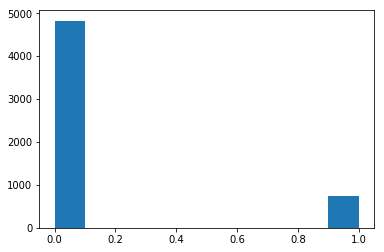

In [14]:
# Look at data balance. Most of the emails are spam so models will need to possibly be balanced
%matplotlib inline 
import matplotlib.pyplot as plt 

plt.hist(y)

In [15]:
# Create train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [16]:
# Build logistic regression model with l1 penalty (prefers sparsity), balanced weight for unbalanced data,
# random_state set at 42
# Its simply learns weights for all features, then sums them and squashes the answer between 0 and 1
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty = 'l1', class_weight = 'balanced', random_state = 42, verbose = 1)

In [17]:
# Train model
model.fit(X_train, y_train)

[LibLinear]

C:\Users\srder\Miniconda3\envs\conda_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=42,
          solver='warn', tol=0.0001, verbose=1, warm_start=False)

In [18]:
# Check scores on accuracy and f1 score (f1 better because it considers recall and precision scores)
from sklearn.metrics import accuracy_score, f1_score

print('Accuracy', accuracy_score(y_test, model.predict(X_test))*100, '%')
print('F1 score', f1_score(y_test, model.predict(X_test)) * 100, '%')

Accuracy 97.4910394265233 %
F1 score 90.0 %


In [19]:
# Now train decision tree, it learns decisions about the features (is the word "dog" included for example and not "cat")
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
# Not as good!
print('Accuracy', accuracy_score(y_test, model.predict(X_test))*100, '%')
print('F1 score', f1_score(y_test, model.predict(X_test)) * 100, '%')

Accuracy 96.95340501792114 %
F1 score 87.21804511278195 %


In [21]:
# Try an ensemble (many models making the decision). In particular a random forest
# A random forest is a bunch of decision trees train on different subsets of the data
# The final answer takes the average answer of all the trees. We make 300 trees
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(300)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
# Even Better!
print('Accuracy', accuracy_score(y_test, model.predict(X_test))*100, '%')
print('F1 score', f1_score(y_test, model.predict(X_test)) * 100, '%')

Accuracy 98.02867383512545 %
F1 score 91.60305343511452 %


In [23]:
# Now we look to see what mistakes the network is making using a confusion matrix
from sklearn.metrics import confusion_matrix

print('Got 487 hams right and 61 spams right. Got 4 hams wrong and 6 spams wrong')
print('')
print(confusion_matrix(y_test, model.predict(X_test)))

Got 487 hams right and 61 spams right. Got 4 hams wrong and 6 spams wrong

[[487   4]
 [  7  60]]


In [24]:
# Whats the longest email?
max_len = np.max([len(email.split()) for email in processed_corpus])
print(max_len)

77


In [25]:
# Now we go overkill with a deep conv-LSTM style neural network with embeddings
from keras.models import Input, Model
from keras.layers import Dense, Embedding, Activation, LSTM, Conv1D, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', patience = 2, mode = 'auto')
rmsprop = RMSprop(lr = 0.0001)

X_input = Input(shape = (max_len,), name = 'Input_layer')
X_tensor = Embedding(len(vocabulary), 50, trainable = True, name = 'Embedding_layer')(X_input)
X_tensor = Conv1D(50, 3, name = 'Conv_layer')(X_tensor)
X_tensor = Activation('relu')(X_tensor)
X_tensor = Dropout(0.3)(X_tensor)
X_tensor = LSTM(50, return_sequences = False, name = 'LSTM_Layer')(X_tensor)
X_tensor = Activation('relu')(X_tensor)
X_tensor = Dropout(0.3)(X_tensor)
X_output = Dense(2, activation = 'softmax', name = 'output_layer')(X_tensor)

model = Model(inputs = X_input, outputs = X_output)
model.compile(loss = 'categorical_crossentropy', optimizer = rmsprop, metrics = ['accuracy'])

Using TensorFlow backend.


In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     (None, 77)                0         
_________________________________________________________________
Embedding_layer (Embedding)  (None, 77, 50)            25000     
_________________________________________________________________
Conv_layer (Conv1D)          (None, 75, 50)            7550      
_________________________________________________________________
activation_1 (Activation)    (None, 75, 50)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 50)            0         
_________________________________________________________________
LSTM_Layer (LSTM)            (None, 50)                20200     
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
__________

In [27]:
# Tokenize the emails this time
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(len(vocabulary))
tokenizer.fit_on_texts(processed_corpus)

In [28]:
# Tokenize and pad to maximum length
from keras.preprocessing.sequence import pad_sequences

X_tok = pad_sequences(tokenizer.texts_to_sequences(processed_corpus), max_len)

In [29]:
# Split again but in same way using same seed
X_train_tok, X_test_tok, y_train, y_test = train_test_split(X_tok, y, test_size = 0.1, random_state = 42)

In [30]:
# Train deep learning model 
from keras.utils import to_categorical
epochs = 40

model.fit(X_train_tok, to_categorical(y_train), 
          epochs = epochs,
          verbose = 1, 
          shuffle = True, 
          validation_split = 0.1, 
          callbacks = [early_stop])

Train on 4512 samples, validate on 502 samples
Epoch 1/40
4512/4512 [==============================] - 4s 965us/step - loss: 0.5495 - acc: 0.8562 - val_loss: 0.3761 - val_acc: 0.8645
Epoch 2/40
4512/4512 [==============================] - 4s 783us/step - loss: 0.3588 - acc: 0.8644 - val_loss: 0.3328 - val_acc: 0.8645
Epoch 3/40
4512/4512 [==============================] - 4s 818us/step - loss: 0.2957 - acc: 0.8672 - val_loss: 0.2663 - val_acc: 0.8765
Epoch 4/40
4512/4512 [==============================] - 4s 807us/step - loss: 0.2227 - acc: 0.9229 - val_loss: 0.2048 - val_acc: 0.9422
Epoch 5/40
4512/4512 [==============================] - 4s 809us/step - loss: 0.1651 - acc: 0.9590 - val_loss: 0.1587 - val_acc: 0.9641
Epoch 6/40
4512/4512 [==============================] - 4s 781us/step - loss: 0.1213 - acc: 0.9719 - val_loss: 0.1285 - val_acc: 0.9641
Epoch 7/40
4512/4512 [==============================] - 4s 803us/step - loss: 0.0904 - acc: 0.9783 - val_loss: 0.1115 - val_acc: 0.9641
E

In [33]:
# Best Model 
model.evaluate(X_test_tok, to_categorical(y_test))[1] * 100

558/558 [==============================] - 0s 182us/step


98.56630824372759